**Introduction to the Data set :  OLYMPICS GAMES**


We are going to see the Athelets who participated and won different medals in Olympics which are happened in different years and its  analysis using Python. 
1. The modern Olympic Games or Olympics are leading international sports events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. 
2. The Olympic Games are considered the world’s top sports competition with more than 200 nations participating.

3. The total number of sports conducted in the different Olympic seasons are  49 . 

4. 110 countries athelets data we have in this data set

And for every event there are winners. Therefore various data is generated. So, by using Python we are going to  analyze the data.

**PySpark** is an interface for **Apache Spark** in **Python**. 

**It allows us to write Spark applications using Python APIs,and also provides the PySpark shell for interactively analyzing our data in a distributed environment.**

In [1]:
!pip install pyspark
from pyspark.sql import SparkSession

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 63.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=a47a0f61f9af417e4090668cc46016dc32a2bd3c324916ca03013fb053163685
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


**Spark Session** is the entry point to programming Spark with the Dataset and DataFrame API. A SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables, cache tables, and read parquet files.

## 1)	Write PySpark code to read olympix_data.csv file



In [2]:
#initialization of spark session
sk = SparkSession.builder.appName("Capstone_Project").getOrCreate()

#loading the dataset
df = sk.read.format("csv").option("header", "true").load("/content/my_olympics_data_31-05-2022.csv")

In [3]:
#Structure of the datasets
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: string (nullable = true)
 |-- country: string (nullable = true)
 |-- year: string (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: string (nullable = true)
 |-- silver_medal: string (nullable = true)
 |-- bronze_medal: string (nullable = true)
 |-- total_medal: string (nullable = true)



**Observations** :- After the reading the csv files, pyspark reading all the columns data type as string only.
But, it is not correct we have some numerical value columns and others also according to that data in the data set.

In [65]:
summary = df.describe().show()

+-------+-----------+------------------+-----------+------------------+----------+-------------+-------------------+-------------------+------------------+-------------------+
|summary|       name|               age|    country|              year|Date_Given|       sports|         gold_medal|       silver_medal|      bronze_medal|        total_medal|
+-------+-----------+------------------+-----------+------------------+----------+-------------+-------------------+-------------------+------------------+-------------------+
|  count|       8613|              8613|       8613|              8613|      8613|         8613|               8613|               8613|              8613|               8613|
|   mean|       null|26.363440634730914|       null|2005.9753860443516|      null|         null|0.36491350284453733|0.36293974225008707|0.3779171020550331| 1.1057703471496574|
| stddev|       null|4.9455808459051935|       null| 4.288736772385435|      null|         null|  0.545436335998911| 0.5

### So, we have to change the data types of the columns given in the data set accordingly by using below functions

In [8]:
from pyspark.sql.types import StringType, DateType, FloatType,IntegerType
  
new_df = df \
  .withColumn("name" ,
              df["name"]
              .cast(StringType()))   \
  .withColumn("age",
              df["age"]
              .cast(FloatType()))    \
  .withColumn("country"  ,
              df["country"]
              .cast(StringType())) \
  .withColumn("year"  ,
              df["year"]
              .cast(IntegerType())) \
  .withColumn("Date_Given"  ,
              df["Date_Given"]
              .cast(StringType())) \
  .withColumn("sports"  ,
              df["sports"]
              .cast(StringType())) \
  .withColumn("gold_medal"  ,
              df["gold_medal"]
              .cast(IntegerType())) \
  .withColumn("silver_medal"  ,
              df["silver_medal"]
              .cast(IntegerType())) \
  .withColumn("bronze_medal"  ,
              df["bronze_medal"]
              .cast(IntegerType())) \
  .withColumn("total_medal"  ,
              df["total_medal"]
              .cast(IntegerType())) \

  
new_df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: float (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- bronze_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



**Observations** :- By using withcolumn and cast functions we changed the  data types of each and every column as required.

And checked the data types after convertion by using printschema function.

In [64]:
new_summary = new_df.describe().show()

+-------+-----------+------------------+-----------+------------------+----------+-------------+-------------------+-------------------+------------------+-------------------+
|summary|       name|               age|    country|              year|Date_Given|       sports|         gold_medal|       silver_medal|      bronze_medal|        total_medal|
+-------+-----------+------------------+-----------+------------------+----------+-------------+-------------------+-------------------+------------------+-------------------+
|  count|       8613|              8613|       8613|              8613|      8613|         8613|               8613|               8613|              8613|               8613|
|   mean|       null| 26.36344063419035|       null|2005.9753860443516|      null|         null|0.36491350284453733|0.36293974225008707|0.3779171020550331| 1.1057703471496574|
| stddev|       null|4.9455808442272176|       null| 4.288736772385435|      null|         null|  0.545436335998911| 0.5

**Observations** :- We can see that total no.of records are 8613 and we have 10 attributes which tells us about the data recorded.

In [29]:
print((new_df.count(), len(new_df.columns)))

(8613, 10)


## 2)	Write PySpark code to print the Olympic Sports/games in the dataset.


In [71]:
Olympics_Sports = new_df.select('sports').distinct().show(n=150,truncate=False)


+-------------------------+
|sports                   |
+-------------------------+
|Gymnastics               |
|Tennis                   |
|Boxing                   |
|Short-Track Speed Skating|
|Ice Hockey               |
|Rowing                   |
|Judo                     |
|Softball                 |
|Sailing                  |
|Swimming                 |
|Alpine Skiing            |
|Basketball               |
|Handball                 |
|Rhythmic Gymnastics      |
|Biathlon                 |
|Triathlon                |
|Badminton                |
|Athletics                |
|Figure Skating           |
|Beach Volleyball         |
|Equestrian               |
|Shooting                 |
|Diving                   |
|Skeleton                 |
|Ski Jumping              |
|Nordic Combined          |
|Wrestling                |
|Speed Skating            |
|Table Tennis             |
|Taekwondo                |
|Canoeing                 |
|Weightlifting            |
|Waterpolo          

**Observations** :- By using select and distinct function we can able to fetch all countries in the data set without repeating the sports names we have.

## 3)	Write PySpark code to plot the total number of medals in  each Olympic Sport/game


**Note**  :-  

To plot a graph or chart, it is not possible in PySpark.

So, we have to convert our pyspark prepared data frame to pandas data frame.
And then as usual by using matplotlib library we can plot any chart.

Before, going to that we should import or install pandas, matplotlib and other required libraries and then start exploring the things.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pyspark.sql import SQLContext
sqlContext = SQLContext
import plotly as py
import plotly.graph_objs as go


So, first I like to prepare my data as per our requirement like we have to sum up the total no.of medals gain on each sport by using agggregate function sum on "total_medal" and seggregate(group by) function on "sports" column as shown below.

In [97]:
dffplot = new_df.groupBy("sports").sum("total_medal")

After creating the data frame as required we have to assign to a variable.
And use it for the purpose of plotting the chart as shown as below.

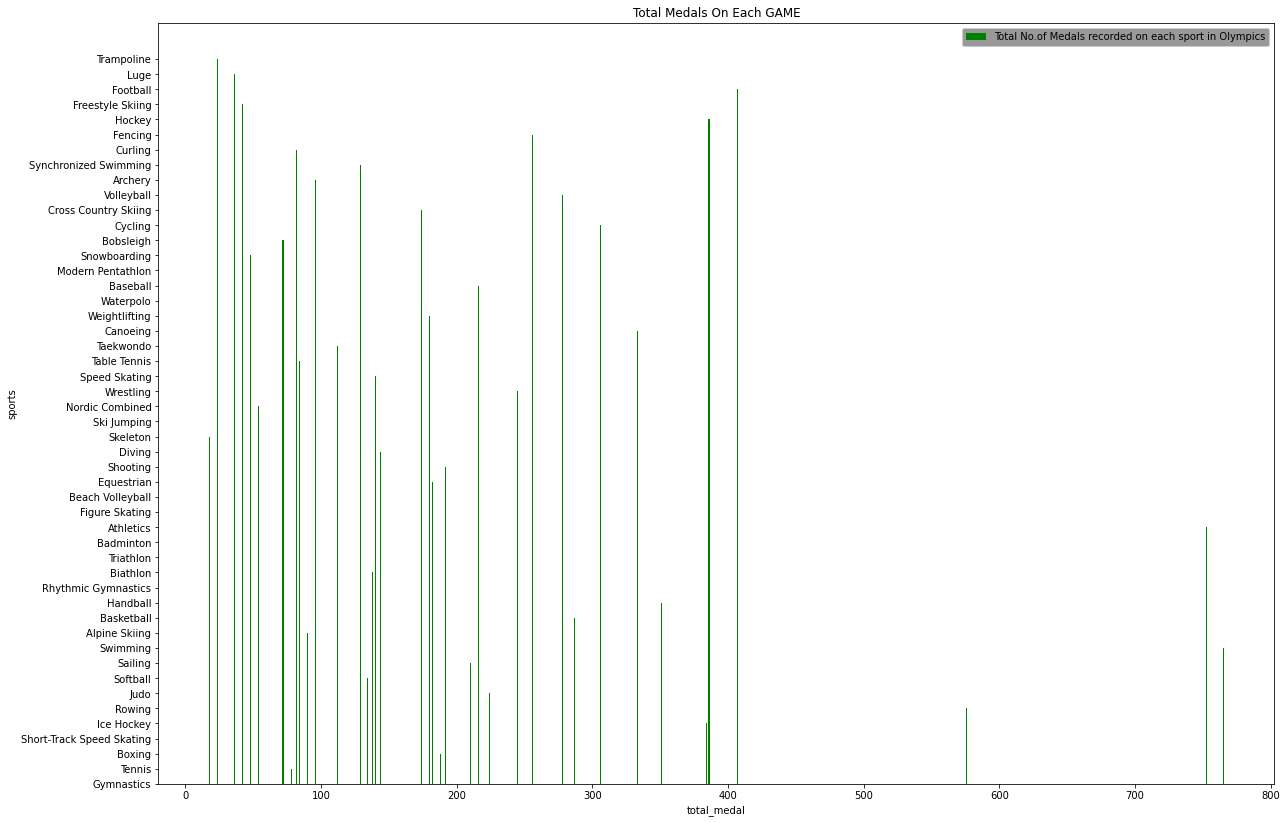

In [96]:
y = dffplot.toPandas()["sports"].values.tolist()
x = dffplot.toPandas()["sum(total_medal)"].values.tolist()
hfig = plt.figure(figsize =(20, 14))
plt.bar(x,y, color = 'green', label = "Total No.of Medals recorded on each sport in Olympics")
plt.title("Total Medals On Each GAME")
plt.ylabel("sports")
plt.xlabel("total_medal")
plt.legend(facecolor = 'grey')
plt.show()

**Observations** :- As shown as above we can plot a beautiful plot by giving titles, labels, color and giving axis values which depicts the data in aneasy manner.

We can see "Trampaline" sport got highest Total medals

And "Skeleton" sport got lowest total medals.

## 4)	Sort the result based on the total number of medals.


In [101]:
from pyspark.sql.functions import sum,desc
total_no_of_medals_eachCountry =new_df.groupby(["sports"]).agg(sum("total_medal").alias("Total_Medals")).sort(desc("Total_Medals"))
total_no_of_medals_eachCountry.show(n=150,truncate=False)

+-------------------------+------------+
|sports                   |Total_Medals|
+-------------------------+------------+
|Swimming                 |765         |
|Athletics                |753         |
|Rowing                   |576         |
|Football                 |407         |
|Hockey                   |386         |
|Ice Hockey               |384         |
|Handball                 |351         |
|Canoeing                 |333         |
|Waterpolo                |306         |
|Cycling                  |306         |
|Basketball               |287         |
|Gymnastics               |282         |
|Volleyball               |278         |
|Fencing                  |256         |
|Wrestling                |245         |
|Judo                     |224         |
|Baseball                 |216         |
|Sailing                  |210         |
|Shooting                 |192         |
|Boxing                   |188         |
|Equestrian               |182         |
|Weightlifting  

## 5)	Find the total number of medals won by each country in swimming.


**Observations** :- To get the total no.of medals won by each country in swimming  especially 

we should filter the sports column with swimming by using "filter" function
we have to use "groupby" function to aggregate the country names
and its our wish we have to show from Higher order (count) to lower order (count) or vice versa.

**United States tops in winning total(all types) number of medals at swimming sport.**

In [44]:
Swimming_medals=new_df.filter(new_df['sports']== "Swimming").groupby('country').count().sort(desc("count")).show(n=150,truncate=False)

+-------------------+-----+
|country            |count|
+-------------------+-----+
|United States      |145  |
|Australia          |92   |
|Netherlands        |32   |
|Japan              |30   |
|China              |29   |
|Germany            |27   |
|France             |26   |
|Russia             |19   |
|Italy              |13   |
|Great Britain      |9    |
|South Africa       |8    |
|Sweden             |7    |
|Brazil             |7    |
|Hungary            |7    |
|Canada             |5    |
|Romania            |4    |
|Ukraine            |4    |
|South Korea        |2    |
|Zimbabwe           |2    |
|Tunisia            |2    |
|Spain              |2    |
|Austria            |2    |
|Norway             |2    |
|Slovakia           |1    |
|Poland             |1    |
|Argentina          |1    |
|Costa Rica         |1    |
|Belarus            |1    |
|Lithuania          |1    |
|Serbia             |1    |
|Croatia            |1    |
|Denmark            |1    |
|Trinidad and Tobago

## 6)	Find the total number of medals won by each country in Skeleton.


In [48]:
Total_Medals_medals=new_df.filter(new_df['sports']== "Skeleton").groupby('country').count().sort(desc("count")).show(n=50,truncate=False)

+-------------+-----+
|country      |count|
+-------------+-----+
|Canada       |4    |
|Great Britain|3    |
|Switzerland  |3    |
|United States|3    |
|Germany      |2    |
|Russia       |1    |
|Austria      |1    |
|Latvia       |1    |
+-------------+-----+



**Observations** :- 
To get the total no.of medals won by each country in skeleton sport
we have sum the no.of medals by each country by aggregating(group by function) and have to filter the sport " Skeleton" as asked as condition to get the result.

**Note :-**  

1. Canada tops in the list with **04 medals** in the skeleton game/sport.

2. Where as Great Britain,Switzerland and United States got **03 medals** each.
Germany got 02 medals in total.

3. And Russia,Austria,Latvia got only **01 medal each**.

## 7)	Find the number of medals that the US won yearly.


In [53]:
from pyspark.sql.functions import sum,desc
data=new_df.filter(new_df['country']== "United States").groupby(["country","year"]).agg(sum("total_medal").alias("Total_Medals")).sort("year")
data.show(n=150,truncate=False)

+-------------+----+------------+
|country      |year|Total_Medals|
+-------------+----+------------+
|United States|2000|243         |
|United States|2002|84          |
|United States|2004|265         |
|United States|2006|52          |
|United States|2008|317         |
|United States|2010|97          |
|United States|2012|254         |
+-------------+----+------------+



**Observations** :-   

Total no.of medals won by US country year wise are ..

In the year 2008 it won highest no.of medals "317".

Where as 2004 won "265"

In 2012 won "254" and

 in 2000 it won "243".

## 8)	Find the total number of medals won by each country.


**Observations** :-  

To get the total no.of medals by each country
We have group country names by using "groupby" function 
And have to do summation of total medals by using aggregate function "sum".

**Note :-** 

United states have highest no.of total medals like sum of Gold,Silver and Bronze with 1312 medals.

Where as Russia and Germany are with 2nd and 3rd places with 768 and 629 medals.

In [56]:
from pyspark.sql.functions import sum,desc
data=new_df.groupby(["country"]).agg(sum("total_medal").alias("Total_Medals")).sort(desc("Total_Medals"))
data.show(n=150,truncate=False)

+---------------------+------------+
|country              |Total_Medals|
+---------------------+------------+
|United States        |1312        |
|Russia               |768         |
|Germany              |629         |
|Australia            |609         |
|China                |530         |
|Canada               |370         |
|Italy                |331         |
|Great Britain        |322         |
|France               |318         |
|Netherlands          |318         |
|South Korea          |308         |
|Japan                |282         |
|Brazil               |218         |
|Spain                |205         |
|Norway               |192         |
|Cuba                 |188         |
|Sweden               |181         |
|Hungary              |145         |
|Ukraine              |143         |
|Argentina            |139         |
|Romania              |123         |
|Finland              |118         |
|Belarus              |97          |
|Switzerland          |93          |
|

## 9)	Who was the oldest athlete in the olympics? 


In [60]:
original_df = sk.read.format("csv").option("header", "true").load("/content/olympixcs_data_22-05-2022.csv")

In [72]:
Oldest_athelete = original_df.select('name',"age").sort(desc("age")).show(n=10,truncate=False)


+----------------------+---+
|name                  |age|
+----------------------+---+
|Ian Millar            |61 |
|Mark Todd             |56 |
|Mac Cone              |55 |
|Nick Skelton          |54 |
|Lesley Thompson-Willie|52 |
|Peter Charles         |52 |
|Ilario Di Buò         |51 |
|Mary Thomson-King     |51 |
|Peter Thomsen         |51 |
|Jean Teulère          |50 |
+----------------------+---+
only showing top 10 rows



**Observations**  :-  

With the cleaned data set of Olympics games data set it will shows so many athelets with hghest age. Why because we treated age column to eliminate erros.

**Note** :- So, again we considered original data set and checked the Highest age of the Athelete participated in Olympics games.

His name is **Ian Millar** with Age of **61**

In [ ]:
Olympics_Sports = new_df.select('name',"age").sort(desc("age")).show()
Olympics_Sports

## 10)	Which country was he/she from?

**Observations** :- After viewing the data set, we didn't find any Gender column specifying the gender of an Athelete. So, we can't depicit an athelete whether the person is he or she.